In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import astropy.io.fits as pf
from stingray.pulse import epoch_folding_search
from stingray.pulse import get_orbital_correction_from_ephemeris_file
import Important_Functions as IF
import scipy.stats as st
from importlib import reload

/opt/anaconda3/envs/testenv/lib/python3.10/site-packages/stingray/utils.py:25: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")
/opt/anaconda3/envs/testenv/lib/python3.10/site-packages/stingray/utils.py:40: UserWarning: Numba not installed. Faking it
  warnings.warn("Numba not installed. Faking it")


# We retrieve the data for two data sets to add them together

In [85]:
#Retrieving data for source file
Time_phase_file_A = pf.open('sourceA.evt')
Time_phase_file_B = pf.open('sourceB.evt')

#Getting event arrival time data
Time_phase_data_A=Time_phase_file_A[1].data
Time_phase_data_B=Time_phase_file_B[1].data


# Get GTIs for both datasets

In [131]:
new_gti_A = IF.get_GTIs(Time_phase_file_A[2])
new_gti_B = IF.get_GTIs(Time_phase_file_B[2])

#The two GTI array have essentially the same values so we set 
new_gti = new_gti_A

# Orbitally correcting the arrival times

In [5]:
correct_orbital_time_A = IF.get_orbital_correction(Time_phase_file_A[1], 'orbit_t2.txt')
correct_orbital_time_B = IF.get_orbital_correction(Time_phase_file_B[1], 'orbit_t2.txt')


/opt/anaconda3/envs/testenv/lib/python3.10/site-packages/stingray/utils.py:142: UserWarning: SIMON says: Assuming events are already referred to the solar system barycenter (timescale is TDB)
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
2022-10-31 13:47:30.368 | DEBUG    | pint.toa:__init__:1310 - No pulse number flags found in the TOAs
2022-10-31 13:47:30.370 | DEBUG    | pint.toa:compute_TDBs:2139 - Computing TDB columns.
2022-10-31 13:47:30.370 | DEBUG    | pint.toa:compute_TDBs:2164 - Using EPHEM = DE405 for TDB calculation.
2022-10-31 13:47:30.442 | DEBUG    | pint.toa:compute_posvels:2255 - Computing PosVels of observatories and Earth, using DE405
2022-10-31 13:47:30.450 | DEBUG    | pint.toa:compute_posvels:2310 - SSB obs pos [0. 0. 0.] m
2022-10-31 13:47:31.494 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:54 - Set solar system ephemeris to de405 from download
2022-10-31 13:47:31.516 | DEBUG    | pint.toa:compute_posvels:2324 - Adding columns ssb_

# Getting data for the two events at the same time

In [129]:
correct_time = np.concatenate((correct_orbital_time_A, correct_orbital_time_B))
total_energies = np.concatenate((Time_phase_data_A['PI'], Time_phase_data_B['PI']))

ind = np.argsort(correct_time)

total_correct_time = correct_time[ind]
total_correct_energies = total_energies[ind]


## Using the event arrival times with orbital correction and the Stingray function epoch_folding_search to find pulse frequency

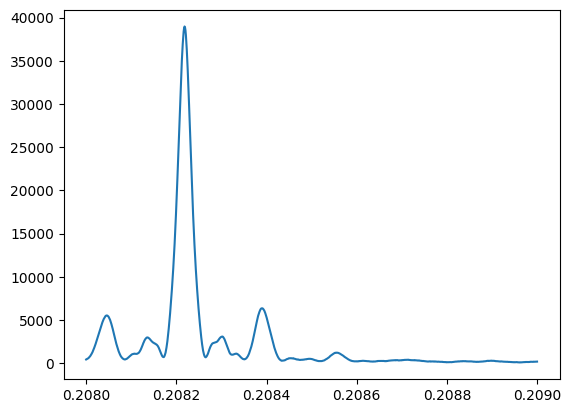

0.2082182182182182


In [8]:
correct_list, guess_freq = IF.get_pulse_freq(0.208, 0.209, 1000, correct_orbital_time_A, new_gti_A, 20000)
#Plotting the power as a function energy
plt.plot(correct_list[0], correct_list[1])
plt.show()
print(guess_freq)

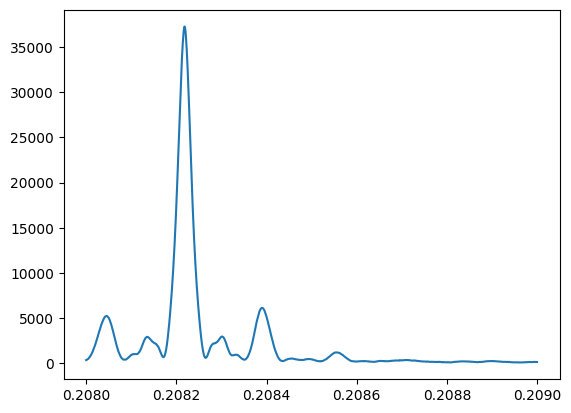

0.2082182182182182


In [9]:
correct_list, guess_freq = IF.get_pulse_freq(0.208, 0.209, 1000, correct_orbital_time_B, new_gti_B, 20000)
#Plotting the power as a function energy
plt.plot(correct_list[0], correct_list[1])
plt.show()
print(guess_freq)

# For two events

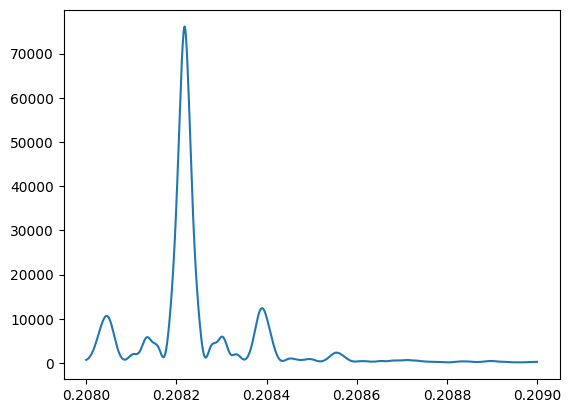

0.2082182182182182


In [132]:
correct_list, guess_freq = IF.get_pulse_freq(0.208, 0.209, 1000, total_correct_time, new_gti, 20000)
#Plotting the power as a function energy
plt.plot(correct_list[0], correct_list[1])
plt.show()
print(guess_freq)

# Getting the ENERGY pulse profile matrix


In [23]:
reload(IF)
energy_time_segments_A, energy_segments_A = IF.segment_energywise(correct_orbital_time_A, 
                                                              Time_phase_data_A['PI'], 120, 2800, -50)

energy_time_segments_B, energy_segments_B = IF.segment_energywise(correct_orbital_time_B, 
                                                              Time_phase_data_B['PI'], 120, 2800, -50)


In [133]:
energy_time_segments, energy_segments = IF.segment_energywise(total_correct_time, 
                                                              total_correct_energies, 120, 2800, -50)

5
2
5
2
5
6
2
9
10
2
10
10
6
5
9
9
6
9
7
4
6
5
7
9
4
4
3
2


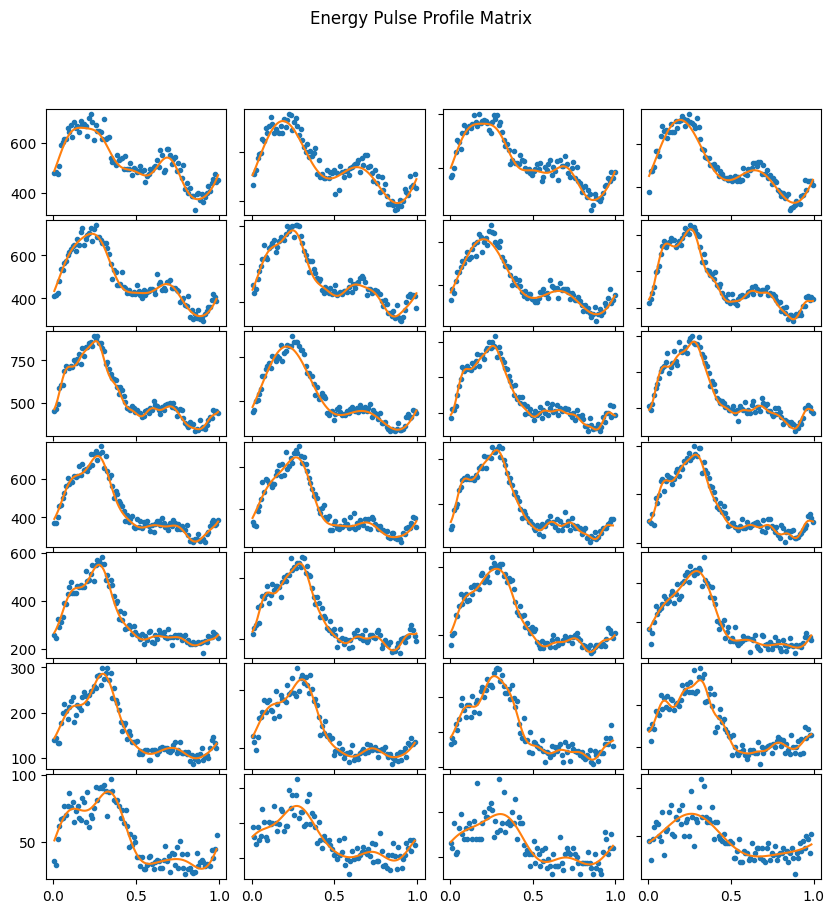

In [65]:
reload(IF)

energy_orders_A, energy_model_phases_A, energy_counts_A, energy_phasefold_time_A=IF.pulse_profile_matrix(energy_time_segments_A, 
                                                                                                 Time_phase_data_A['TIME'][0], 
                                                                                                 [guess_freq], 'Energy Pulse Profile Matrix', 28, 0.01, 0.3)


2
7
2
2
2
6
2
9
10
6
9
9
13
9
2
5
6
6
5
8
6
5
6
2
4
6
10
2


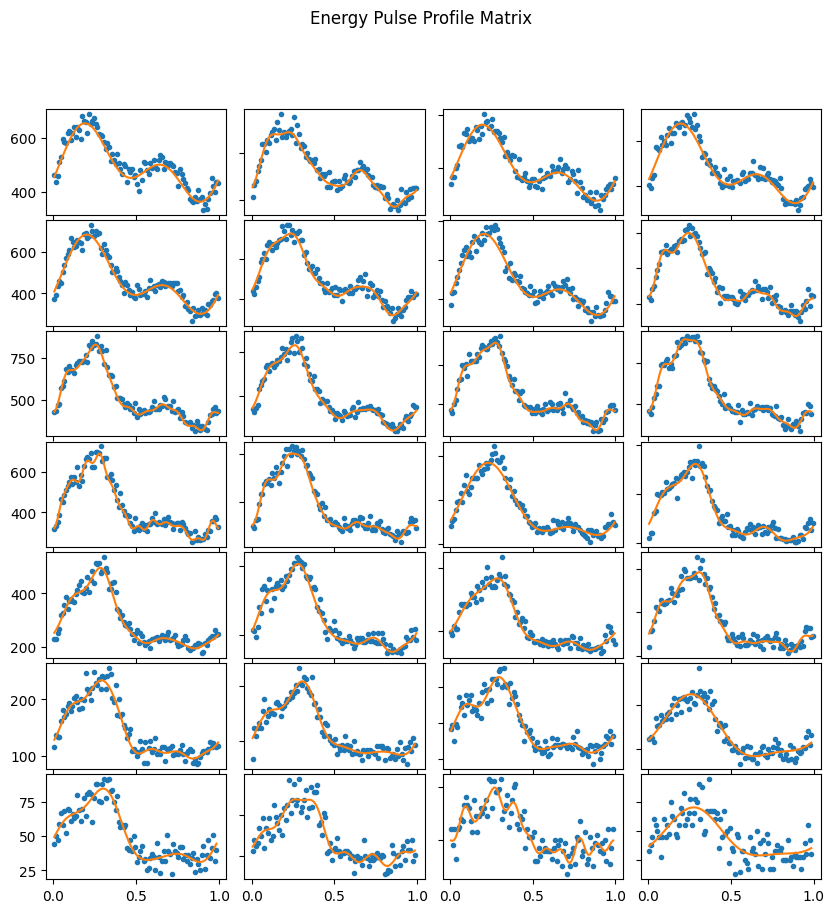

In [66]:
reload(IF)
energy_orders_B, energy_model_phases_B, energy_counts_B, energy_phasefold_time_B=IF.pulse_profile_matrix(energy_time_segments_B, 
                                                                                                 Time_phase_data_B['TIME'][0], 
                                                                                                 [guess_freq], 'Energy Pulse Profile Matrix', 28, 0.01, 0.3)


# Summing two events

2
6
2
6
8
6
2
2
10
6
10
12
6
10
10
5
10
6
12
11
8
5
9
3
6
10
2
3
3
2
3
2


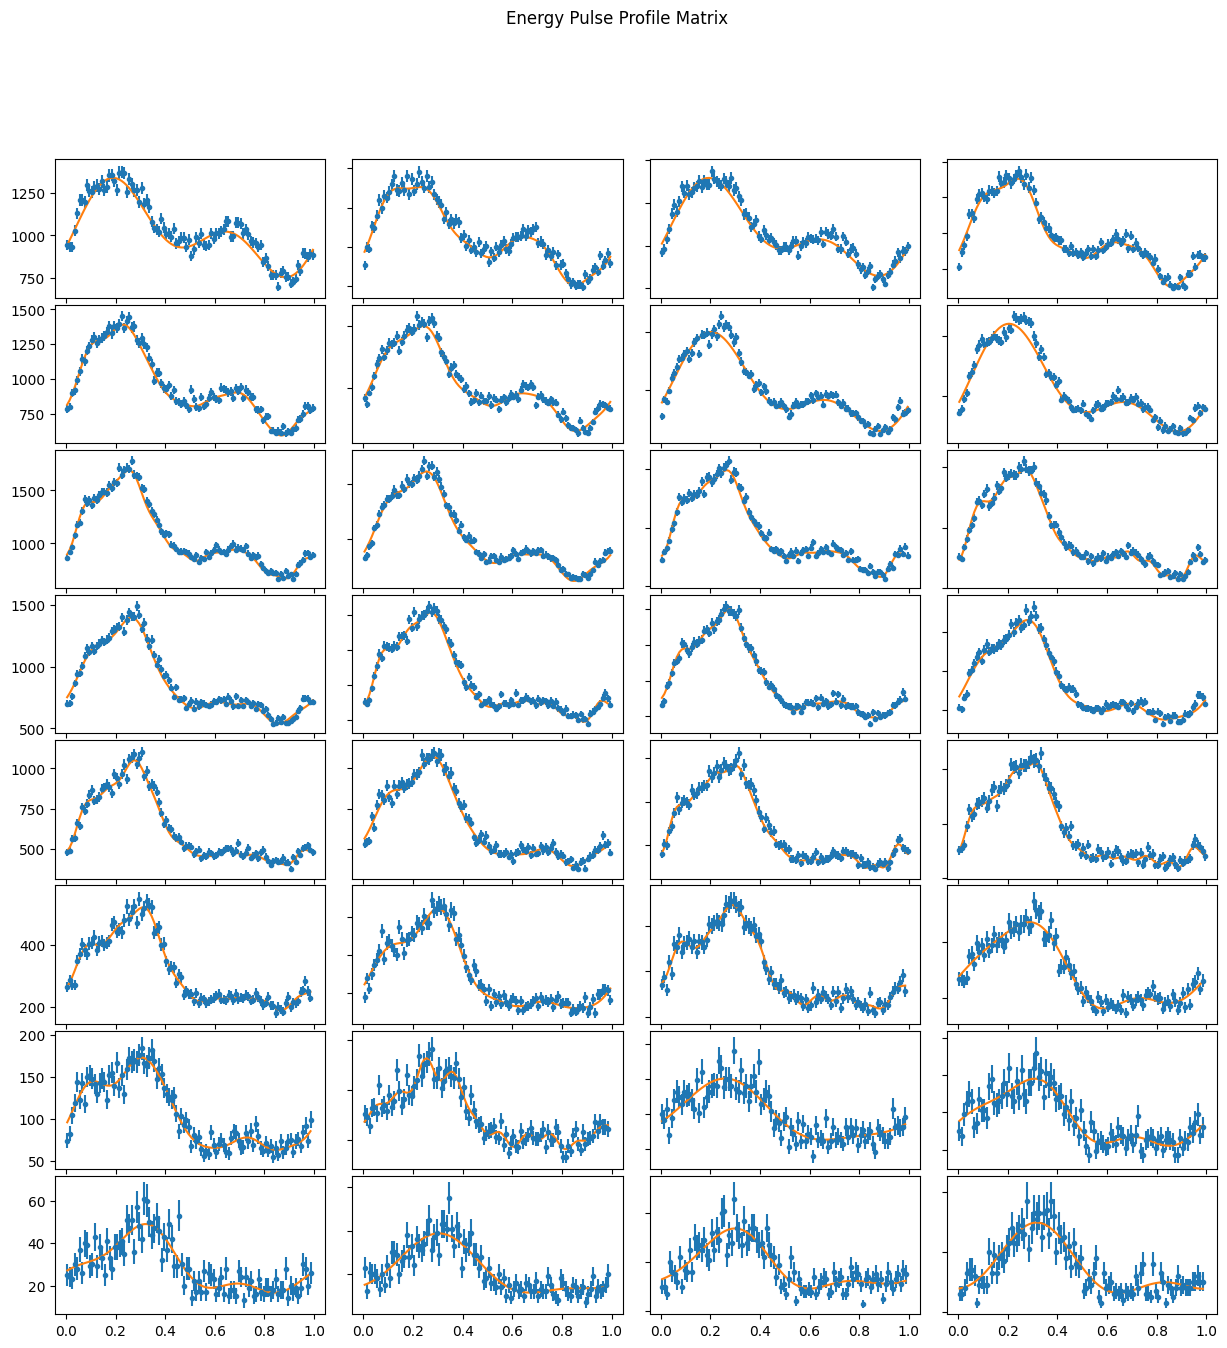

In [239]:
reload(IF)
energy_orders, energy_model_phases, energy_counts, energy_phasefold_time=IF.pulse_profile_matrix(energy_time_segments, 
                                                                                                 Time_phase_data_A['TIME'][0], 
                                                                                                 [guess_freq], 'Energy Pulse Profile Matrix', 32, 0.01, 0.3)


Text(0.5, 1.0, 'Plot of the RMS against Energy for Bootstrap')

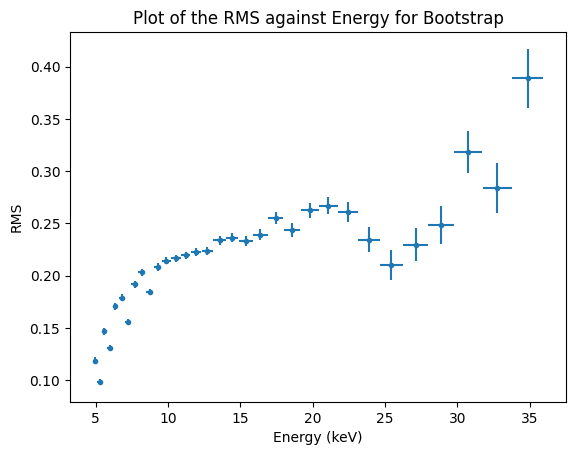

In [57]:
num_realizations = 2000
reload(IF)

RMSs = np.zeros(len(energy_counts_A))
RMS_error = np.ones(len(energy_counts_A))
E_rror = np.ones(len(energy_counts_A))
avg = np.zeros(len(energy_counts_A))

for i in range(len(energy_counts_A)):
    RMS_error[i] = IF.bootstrap_total(energy_counts_A[i], num_realizations, IF.RMS_calculator, energy_orders_A[i])
    RMSs[i] = IF.RMS_calculator(energy_counts_A[i], energy_orders_A[i])
    E_rror[i] = 0.5*(max(energy_segments_A[i])-min(energy_segments_A[i]))
    avg[i] = np.mean(energy_segments_A[i])
    
fig, ax = plt.subplots(1, 1)
ax.errorbar(avg, RMSs, xerr=E_rror, yerr=RMS_error, fmt='.')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('RMS')
ax.set_title('Plot of the RMS against Energy for Bootstrap')

#plt.savefig('/Users/samsonmercier/Desktop/RMS_vs_Energy.pdf')

Text(0.5, 1.0, 'Plot of the RMS against Energy for Bootstrap')

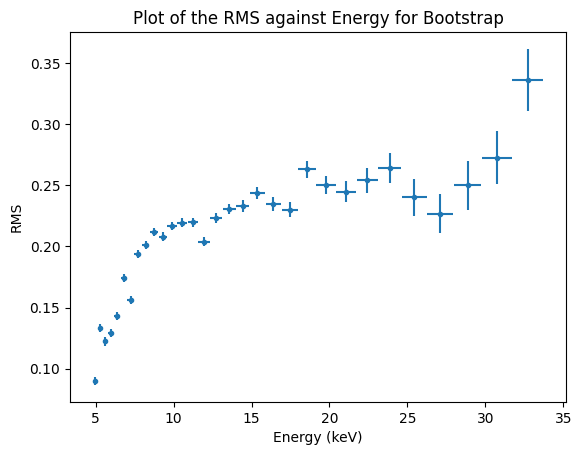

In [58]:
RMSs = np.zeros(len(energy_counts_B))
RMS_error = np.ones(len(energy_counts_B))
E_rror = np.ones(len(energy_counts_B))
avg = np.zeros(len(energy_counts_B))

for i in range(len(energy_counts_B)):
    RMS_error[i] = IF.bootstrap_total(energy_counts_B[i], num_realizations, IF.RMS_calculator, energy_orders_B[i])
    RMSs[i] = IF.RMS_calculator(energy_counts_B[i], energy_orders_B[i])
    E_rror[i] = 0.5*(max(energy_segments_B[i])-min(energy_segments_B[i]))
    avg[i] = np.mean(energy_segments_B[i])
    
fig, ax = plt.subplots(1, 1)
ax.errorbar(avg, RMSs, xerr=E_rror, yerr=RMS_error, fmt='.')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('RMS')
ax.set_title('Plot of the RMS against Energy for Bootstrap')

#plt.savefig('/Users/samsonmercier/Desktop/RMS_vs_Energy.pdf')

# Summing two events

Text(0.5, 1.0, 'Plot of the RMS against Energy for Bootstrap')

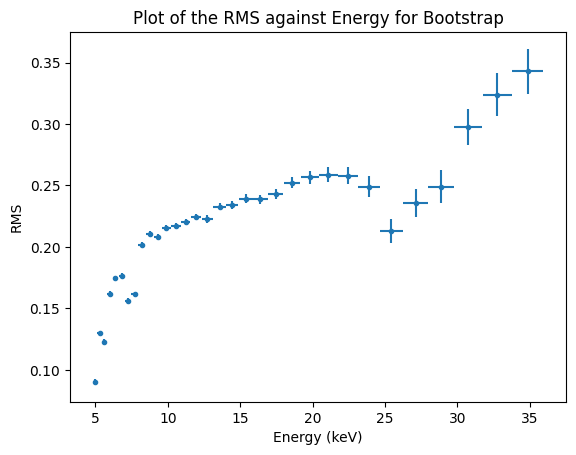

In [233]:
RMSs = np.zeros(len(energy_counts))
RMS_error = np.ones(len(energy_counts))
E_rror = np.ones(len(energy_counts))
avg = np.zeros(len(energy_counts))

for i in range(len(energy_counts)):
    RMS_error[i] = IF.bootstrap_total(energy_counts[i], num_realizations, IF.RMS_calculator, energy_orders[i])
    RMSs[i] = IF.RMS_calculator(energy_counts[i], energy_orders[i])
    E_rror[i] = 0.5*(max(energy_segments[i])-min(energy_segments[i]))
    avg[i] = np.mean(energy_segments[i])
    
fig, ax = plt.subplots(1, 1)
ax.errorbar(avg, RMSs, xerr=E_rror, yerr=RMS_error, fmt='.')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('RMS')
ax.set_title('Plot of the RMS against Energy for Bootstrap')

#plt.savefig('/Users/samsonmercier/Desktop/RMS_vs_Energy.pdf')

# Taking into account the background

In [142]:
Time_phase_file_bc_A = pf.open('backgroundA.evt')
Time_phase_file_bc_B = pf.open('backgroundB.evt')

In [143]:
Time_phase_data_bc_A=Time_phase_file_bc_A[1].data
Time_phase_data_bc_B=Time_phase_file_bc_B[1].data

In [149]:
correct_orbital_time_bc_A = IF.get_orbital_correction(Time_phase_file_bc_A[1], 'orbit_t2.txt')
correct_orbital_time_bc_B = IF.get_orbital_correction(Time_phase_file_bc_B[1], 'orbit_t2.txt')

2022-10-31 15:34:07.167 | DEBUG    | pint.toa:__init__:1310 - No pulse number flags found in the TOAs
2022-10-31 15:34:07.169 | DEBUG    | pint.toa:compute_TDBs:2139 - Computing TDB columns.
2022-10-31 15:34:07.169 | DEBUG    | pint.toa:compute_TDBs:2164 - Using EPHEM = DE405 for TDB calculation.
2022-10-31 15:34:07.244 | DEBUG    | pint.toa:compute_posvels:2255 - Computing PosVels of observatories and Earth, using DE405
2022-10-31 15:34:07.251 | DEBUG    | pint.toa:compute_posvels:2310 - SSB obs pos [0. 0. 0.] m
2022-10-31 15:34:08.753 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:54 - Set solar system ephemeris to de405 from download
2022-10-31 15:34:08.777 | DEBUG    | pint.toa:compute_posvels:2324 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-10-31 15:34:08.794 | DEBUG    | pint.models.solar_system_shapiro:solar_system_shapiro_delay:102 - Skipping Shapiro delay for Barycentric TOAs
2022-10-31 15:34:08.921 | DEBUG    | pint.toa:__init__:1310 - No pulse num

In [151]:
new_gti_bc_A = IF.get_GTIs(Time_phase_file_A[2])
new_gti_bc_B = IF.get_GTIs(Time_phase_file_B[2])

#The two GTI array have essentially the same values so we set 
new_gti_bc = new_gti_A

In [152]:
correct_time_bc = np.concatenate((correct_orbital_time_bc_A, correct_orbital_time_bc_B))
total_energies_bc = np.concatenate((Time_phase_data_bc_A['PI'], Time_phase_data_bc_B['PI']))

ind2 = np.argsort(correct_time_bc)

total_correct_time_bc = correct_time_bc[ind2]
total_correct_energies_bc = total_energies_bc[ind2]


In [240]:
num_segments = -50
E_min = 120
E_max = 2800
energy_time_segments_bc, energy_segments_bc = IF.segment_energywise(total_correct_time_bc, 
                                                              total_correct_energies_bc, E_min, E_max, num_segments)

# Plotting the RMS with and without the background

In [241]:
nobc_energy_counts=[]
for i in range(len(energy_counts)):
    nobc_energy_counts.append(np.array(energy_counts[i])-len(energy_segments_bc[i])/np.abs(num_segments))


Text(0.5, 1.0, 'Plot of the RMS against Energy for Bootstrap')

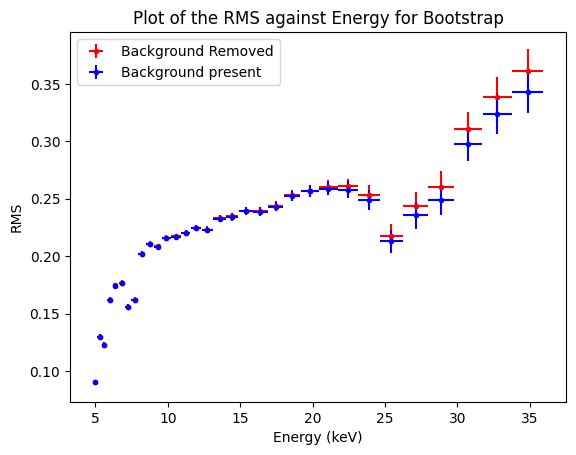

In [243]:
nobc_RMSs = np.zeros(len(energy_counts))
nobc_RMS_error = np.ones(len(energy_counts))
nobc_E_rror = np.ones(len(energy_counts))
nobc_avg = np.zeros(len(energy_counts))

for i in range(len(energy_counts)):
    nobc_RMS_error[i] = IF.bootstrap_total(nobc_energy_counts[i], num_realizations, IF.RMS_calculator, energy_orders[i])
    nobc_RMSs[i] = IF.RMS_calculator(nobc_energy_counts[i], energy_orders[i])
    nobc_E_rror[i] = 0.5*(max(energy_segments[i])-min(energy_segments[i]))
    nobc_avg[i] = np.mean(energy_segments[i])
    
fig, ax = plt.subplots(1, 1)
ax.errorbar(nobc_avg, nobc_RMSs, xerr=nobc_E_rror, yerr=nobc_RMS_error, fmt='r.', label='Background Removed')
ax.errorbar(avg, RMSs, xerr=E_rror, yerr=RMS_error, fmt='b.', label='Background present')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('RMS')
ax.legend()
ax.set_title('Plot of the RMS against Energy for Bootstrap')

#plt.savefig('/Users/samsonmercier/Desktop/RMS_vs_Energy.pdf')